#Instalações necessárias

In [1]:
pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 8.4 MB/s eta 0:00:00


In [2]:
pip install yfinance

#Importações

In [1]:
import yfinance as yF
import pandas as pd
import datetime
import openpyxl
from datetime import datetime
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations

# Criação de dataset com Yahoo Finance

### Seleção de instituições financeiras a serem avaliadas, com objetivo de selecionar 3 pair tradings.

In [2]:
tickers_ADMF = ['SANB11.SA','BBAS3.SA', 'ITSA4.SA', 'BBDC3.SA', 'ABCB4.SA', 'ITUB4.SA', 'BMGB4.SA', 'BRSR6.SA', 'BEES3.SA', 'BPAC11.SA', 'BAZA3.SA', 'PINE4.SA', 'BRBI11.SA', 'BPAN4.SA', 'BMIN4.SA', 'BSLI3.SA']
DATA_ADMF = yF.download(tickers_ADMF, period = '2y', interval = '1h')['Close']
DATA_ADMF = DATA_ADMF.reset_index()
DATA_ADMF

[*********************100%%**********************]  16 of 16 completed


Ticker,Datetime,ABCB4.SA,BAZA3.SA,BBAS3.SA,BBDC3.SA,BEES3.SA,BMGB4.SA,BMIN4.SA,BPAC11.SA,BPAN4.SA,BRBI11.SA,BRSR6.SA,BSLI3.SA,ITSA4.SA,ITUB4.SA,PINE4.SA,SANB11.SA
0,2022-04-27 10:00:00-03:00,16.469999,NaN,17.080000,15.13,5.16,2.88,NaN,24.320000,9.79,16.049999,10.79,NaN,8.155844,24.580000,1.39,31.879999
1,2022-04-27 11:00:00-03:00,16.340000,45.000000,17.035000,15.10,5.17,2.87,NaN,23.830000,9.70,16.059999,10.82,NaN,8.138528,24.620001,1.40,31.820000
2,2022-04-27 12:00:00-03:00,16.400000,NaN,17.049999,15.19,5.20,2.86,NaN,23.780001,9.70,15.990000,10.76,NaN,8.129870,24.650000,1.40,31.799999
3,2022-04-27 13:00:00-03:00,16.370001,NaN,17.000000,15.14,5.19,2.85,NaN,23.799999,9.69,16.070000,10.72,NaN,8.095238,24.570000,1.39,31.740000
4,2022-04-27 14:00:00-03:00,16.420000,NaN,17.129999,15.19,5.18,2.84,NaN,23.889999,9.65,16.090000,10.75,NaN,8.121212,24.610001,1.38,31.809999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,2024-04-26 12:00:00-03:00,23.120001,102.820000,27.639999,12.23,8.72,3.24,NaN,33.820000,9.13,14.790000,12.56,NaN,9.660000,32.110001,4.44,27.110001
3499,2024-04-26 13:00:00-03:00,23.080000,102.820000,27.520000,12.21,8.72,3.22,NaN,33.810001,9.10,14.920000,12.51,NaN,9.640000,32.040001,4.47,27.120001
3500,2024-04-26 14:00:00-03:00,23.120001,102.000000,27.559999,12.22,8.71,3.22,NaN,33.849998,9.23,14.920000,12.50,NaN,9.660000,32.220001,4.45,27.150000
3501,2024-04-26 15:00:00-03:00,23.190001,102.000000,27.620001,12.24,8.70,3.23,NaN,33.959999,9.22,14.790000,12.52,NaN,9.700000,32.320000,4.47,27.400000


# Correlações
###A correlação é uma medida estatística que indica o grau de relação linear entre duas variáveis

In [3]:
corr_matrix = DATA_ADMF.corr().drop(['Datetime'])
corr_matrix

Ticker,Datetime,ABCB4.SA,BAZA3.SA,BBAS3.SA,BBDC3.SA,BEES3.SA,BMGB4.SA,BMIN4.SA,BPAC11.SA,BPAN4.SA,BRBI11.SA,BRSR6.SA,BSLI3.SA,ITSA4.SA,ITUB4.SA,PINE4.SA,SANB11.SA
Ticker,,,,,,,,,,,,,,,,,
ABCB4.SA,0.711137,1.000000,0.673921,0.762544,-0.070359,0.607665,0.736955,0.542490,0.783985,0.523788,0.478127,0.620986,-0.606510,0.865527,0.915422,0.749768,0.063783
BAZA3.SA,0.972648,0.673921,1.000000,0.916238,-0.461834,0.893643,0.536795,0.558029,0.786550,0.478083,0.217152,0.647003,-0.885662,0.769983,0.758895,0.921057,-0.272075
BBAS3.SA,0.921452,0.762544,0.916238,1.000000,-0.211768,0.924268,0.715560,0.574014,0.905691,0.635203,0.451527,0.834208,-0.773871,0.900706,0.894493,0.923866,-0.013475
BBDC3.SA,-0.501140,-0.070359,-0.461834,-0.211768,1.000000,-0.308561,0.145755,-0.018244,0.028656,0.295736,0.506610,0.050720,0.640098,-0.033353,0.002788,-0.330240,0.765607
BEES3.SA,0.932640,0.607665,0.893643,0.924268,-0.308561,1.000000,0.550945,0.569108,0.871385,0.617801,0.343971,0.840404,-0.769987,0.819702,0.755221,0.935412,-0.143438
BMGB4.SA,0.524219,0.736955,0.536795,0.715560,0.145755,0.550945,1.000000,0.507001,0.774740,0.733517,0.781744,0.734544,-0.473481,0.804748,0.825622,0.643202,0.288073
BMIN4.SA,0.525645,0.542490,0.558029,0.574014,-0.018244,0.569108,0.507001,1.000000,0.597554,0.391961,0.469916,0.534880,-0.234959,0.545814,0.553626,0.550934,0.087197
BPAC11.SA,0.809332,0.783985,0.786550,0.905691,0.028656,0.871385,0.774740,0.597554,1.000000,0.815162,0.655164,0.863483,-0.604322,0.926039,0.899583,0.907469,0.124324
BPAN4.SA,0.460152,0.523788,0.478083,0.635203,0.295736,0.617801,0.733517,0.391961,0.815162,1.000000,0.841393,0.780117,-0.284838,0.701632,0.649860,0.660141,0.306116


#Co-integração e escolha dos pares
###Co-integração é um conceito mais avançado que descreve uma relação de equilíbrio de longo prazo entre duas ou mais séries temporais.

In [4]:
def test_all_cointegration_pairs(df, tickers):
    def check_cointegration(x, y):
        # Limpeza de dados: Remover NaNs e infinitos
        combined = pd.DataFrame({'x': x, 'y': y})
        combined.replace([np.inf, -np.inf], np.nan, inplace=True)  # Substituir infinitos por NaN
        combined.dropna(inplace=True)  # Remover quaisquer linhas com NaN

        # Garantir que ainda há dados suficientes para análise
        if len(combined) < 20:  # Ajuste conforme necessário
            return np.nan  # Retorna NaN se não há dados suficientes para uma análise confiável

        # Estimação por OLS
        x = sm.add_constant(combined['x'])
        result = sm.OLS(combined['y'], x).fit()

        # Teste ADF nos resíduos
        resíduos = result.resid
        adf_result = adfuller(resíduos)
        p_value = adf_result[1]

        return p_value

    results = {}
    for ticker1, ticker2 in combinations(tickers, 2):
        x, y = df[ticker1], df[ticker2]
        p_value = check_cointegration(x, y)
        pair_name = f'{ticker1} and {ticker2}'
        results[pair_name] = p_value
        if pd.isna(p_value):
            print(f"Dados insuficientes ou inadequados para teste de co-integração entre {ticker1} e {ticker2}.")
        else:
            print(f"P-value para {pair_name}: {p_value:.5f}")
            if p_value < 0.05:
                print(f"As séries {pair_name} são co-integradas.")
            else:
                print(f"As séries {pair_name} não são co-integradas.")

    return results

cointegration_results_all_pairs = test_all_cointegration_pairs(DATA_ADMF, tickers_ADMF)

P-value para SANB11.SA and BBAS3.SA: 0.79132
As séries SANB11.SA and BBAS3.SA não são co-integradas.
P-value para SANB11.SA and ITSA4.SA: 0.71589
As séries SANB11.SA and ITSA4.SA não são co-integradas.
P-value para SANB11.SA and BBDC3.SA: 0.08005
As séries SANB11.SA and BBDC3.SA não são co-integradas.
P-value para SANB11.SA and ABCB4.SA: 0.64146
As séries SANB11.SA and ABCB4.SA não são co-integradas.
P-value para SANB11.SA and ITUB4.SA: 0.74241
As séries SANB11.SA and ITUB4.SA não são co-integradas.
P-value para SANB11.SA and BMGB4.SA: 0.57339
As séries SANB11.SA and BMGB4.SA não são co-integradas.
P-value para SANB11.SA and BRSR6.SA: 0.68307
As séries SANB11.SA and BRSR6.SA não são co-integradas.
P-value para SANB11.SA and BEES3.SA: 0.76622
As séries SANB11.SA and BEES3.SA não são co-integradas.
P-value para SANB11.SA and BPAC11.SA: 0.75846
As séries SANB11.SA and BPAC11.SA não são co-integradas.
P-value para SANB11.SA and BAZA3.SA: 0.86416
As séries SANB11.SA and BAZA3.SA não são co-

In [5]:
def high_coint_and_corr_pairs(df, tickers, corr_threshold=0.8, significance_level=0.05):
    def check_cointegration(x, y):
        # Limpeza de dados: Remover NaNs e infinitos
        combined = pd.DataFrame({'x': x, 'y': y})
        combined.replace([np.inf, -np.inf], np.nan, inplace=True)
        combined.dropna(inplace=True)

        if len(combined) < 20:
            return np.nan

        x = sm.add_constant(combined['x'])
        result = sm.OLS(combined['y'], x).fit()
        resíduos = result.resid
        adf_result = adfuller(resíduos)
        p_value = adf_result[1]

        return p_value

    # Calculate correlation matrix
    corr_matrix = df[tickers].corr()

    selected_pairs = {}
    for ticker1, ticker2 in combinations(tickers, 2):
        x, y = df[ticker1], df[ticker2]
        p_value = check_cointegration(x, y)
        correlation = corr_matrix.loc[ticker1, ticker2]

        if not pd.isna(p_value) and p_value < significance_level and correlation > corr_threshold:
            pair_name = f'{ticker1} and {ticker2}'
            selected_pairs[pair_name] = {'p-value': p_value, 'correlation': correlation}
            print(f"As séries {pair_name} são co-integradas com p-value = {p_value:.5f} e têm correlação = {correlation:.3f}.")

    if not selected_pairs:
        print("Nenhum par atende aos critérios de alta co-integração e correlação.")
    else:
        return selected_pairs

results = high_coint_and_corr_pairs(DATA_ADMF, tickers_ADMF)


As séries BBAS3.SA and ITSA4.SA são co-integradas com p-value = 0.04470 e têm correlação = 0.901.
As séries ITSA4.SA and ABCB4.SA são co-integradas com p-value = 0.02933 e têm correlação = 0.866.
As séries ITSA4.SA and BMGB4.SA são co-integradas com p-value = 0.02740 e têm correlação = 0.805.
As séries ITSA4.SA and BPAC11.SA são co-integradas com p-value = 0.03310 e têm correlação = 0.926.
As séries ABCB4.SA and ITUB4.SA são co-integradas com p-value = 0.00425 e têm correlação = 0.915.
As séries ITUB4.SA and BMGB4.SA são co-integradas com p-value = 0.00563 e têm correlação = 0.826.
As séries BPAC11.SA and BPAN4.SA são co-integradas com p-value = 0.00124 e têm correlação = 0.815.
As séries BRBI11.SA and BPAN4.SA são co-integradas com p-value = 0.00900 e têm correlação = 0.841.


Pares selecionados:

**ITSA4.SA e ITUB4.SA**

P-value: 0.04117 e Correlação: 0.975

Este par mostra a correlação mais alta entre os listados, indicando que os preços dessas ações movem-se quase perfeitamente juntos. O p-value, embora não seja o mais baixo, ainda é significativo e indica uma co-integração forte.

**ABCB4.SA e ITUB4.SA**

P-value: 0.00447 e Correlação: 0.914

Este par tem a correlação mais forte depois do primeiro par e o menor p-value, indicando não só que as ações tendem a se mover juntas, mas também que têm uma relação de equilíbrio de longo prazo muito estável.

**ITSA4.SA e BPAC11.SA**

P-value: 0.02925 e Correlação: 0.925

Este par também mostra uma excelente correlação, e o p-value é baixo, sugerindo uma co-integração robusta.

# Normalização de Valores

### A normalização permite comparar ações com diferentes faixas de preços absolutos, esse processo coloca as ações em uma mesma escala para que suas movimentações porram ser comparadas de maneira justa.

In [6]:
normalization_value = DATA_ADMF['ITUB4.SA'][0] / DATA_ADMF['ITSA4.SA'][0]
DATA_ADMF['ITSA4.SA_NORM'] = DATA_ADMF['ITSA4.SA'].multiply(normalization_value).round(4)
print("Normalization value for ITSA4.SA to ITUB4.SA:", normalization_value)


Normalization value for ITSA4.SA to ITUB4.SA: 3.013789955170836


In [7]:
normalization_value2 = DATA_ADMF['ITUB4.SA'][0] / DATA_ADMF['ABCB4.SA'][0]
DATA_ADMF['ABCB4.SA_NORM'] = DATA_ADMF['ABCB4.SA'].multiply(normalization_value2).round(4)
print("Normalization value for ABCB4.SA to ITUB4.SA:", normalization_value2)


Normalization value for ABCB4.SA to ITUB4.SA: 1.4924105008174269


In [8]:
normalization_value3 = DATA_ADMF['BPAC11.SA'][0] / DATA_ADMF['ITSA4.SA'][0]
DATA_ADMF['ITSA4.SA_NORM_B'] = DATA_ADMF['ITSA4.SA'].multiply(normalization_value3).round(4)
print("Normalization value for ITSA4.SA to BPAC11.SA:", normalization_value3)


Normalization value for ITSA4.SA to BPAC11.SA: 2.9819109445696


In [9]:
print(DATA_ADMF[['ITSA4.SA', 'ITUB4.SA', 'ITSA4.SA_NORM', 'ABCB4.SA', 'ABCB4.SA_NORM', 'BPAC11.SA', 'ITSA4.SA_NORM_B']].head())


Ticker  ITSA4.SA   ITUB4.SA  ITSA4.SA_NORM   ABCB4.SA  ABCB4.SA_NORM  \
0       8.155844  24.580000        24.5800  16.469999        24.5800   
1       8.138528  24.620001        24.5278  16.340000        24.3860   
2       8.129870  24.650000        24.5017  16.400000        24.4755   
3       8.095238  24.570000        24.3973  16.370001        24.4308   
4       8.121212  24.610001        24.4756  16.420000        24.5054   

Ticker  BPAC11.SA  ITSA4.SA_NORM_B  
0       24.320000          24.3200  
1       23.830000          24.2684  
2       23.780001          24.2425  
3       23.799999          24.1393  
4       23.889999          24.2167  


In [10]:
DATA_ADMF

Ticker,Datetime,ABCB4.SA,BAZA3.SA,BBAS3.SA,BBDC3.SA,BEES3.SA,BMGB4.SA,BMIN4.SA,BPAC11.SA,BPAN4.SA,BRBI11.SA,BRSR6.SA,BSLI3.SA,ITSA4.SA,ITUB4.SA,PINE4.SA,SANB11.SA,ITSA4.SA_NORM,ABCB4.SA_NORM,ITSA4.SA_NORM_B
0,2022-04-27 10:00:00-03:00,16.469999,NaN,17.080000,15.13,5.16,2.88,NaN,24.320000,9.79,16.049999,10.79,NaN,8.155844,24.580000,1.39,31.879999,24.5800,24.5800,24.3200
1,2022-04-27 11:00:00-03:00,16.340000,45.000000,17.035000,15.10,5.17,2.87,NaN,23.830000,9.70,16.059999,10.82,NaN,8.138528,24.620001,1.40,31.820000,24.5278,24.3860,24.2684
2,2022-04-27 12:00:00-03:00,16.400000,NaN,17.049999,15.19,5.20,2.86,NaN,23.780001,9.70,15.990000,10.76,NaN,8.129870,24.650000,1.40,31.799999,24.5017,24.4755,24.2425
3,2022-04-27 13:00:00-03:00,16.370001,NaN,17.000000,15.14,5.19,2.85,NaN,23.799999,9.69,16.070000,10.72,NaN,8.095238,24.570000,1.39,31.740000,24.3973,24.4308,24.1393
4,2022-04-27 14:00:00-03:00,16.420000,NaN,17.129999,15.19,5.18,2.84,NaN,23.889999,9.65,16.090000,10.75,NaN,8.121212,24.610001,1.38,31.809999,24.4756,24.5054,24.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,2024-04-26 12:00:00-03:00,23.120001,102.820000,27.639999,12.23,8.72,3.24,NaN,33.820000,9.13,14.790000,12.56,NaN,9.660000,32.110001,4.44,27.110001,29.1132,34.5045,28.8053
3499,2024-04-26 13:00:00-03:00,23.080000,102.820000,27.520000,12.21,8.72,3.22,NaN,33.810001,9.10,14.920000,12.51,NaN,9.640000,32.040001,4.47,27.120001,29.0529,34.4448,28.7456
3500,2024-04-26 14:00:00-03:00,23.120001,102.000000,27.559999,12.22,8.71,3.22,NaN,33.849998,9.23,14.920000,12.50,NaN,9.660000,32.220001,4.45,27.150000,29.1132,34.5045,28.8053
3501,2024-04-26 15:00:00-03:00,23.190001,102.000000,27.620001,12.24,8.70,3.23,NaN,33.959999,9.22,14.790000,12.52,NaN,9.700000,32.320000,4.47,27.400000,29.2338,34.6090,28.9245


In [11]:
tickers_of_interest = ['ITSA4.SA', 'ITUB4.SA', 'ABCB4.SA', 'BPAC11.SA', 'ITSA4.SA_NORM', 'ABCB4.SA_NORM', 'ITSA4.SA_NORM_B']

DATA_ADMF = DATA_ADMF[tickers_of_interest + ['Datetime']]  # Incluímos 'Datetime' para manter a referência temporal

# Mostrar as primeiras linhas do DataFrame filtrado
print(DATA_ADMF.head())


Ticker  ITSA4.SA   ITUB4.SA   ABCB4.SA  BPAC11.SA  ITSA4.SA_NORM  \
0       8.155844  24.580000  16.469999  24.320000        24.5800   
1       8.138528  24.620001  16.340000  23.830000        24.5278   
2       8.129870  24.650000  16.400000  23.780001        24.5017   
3       8.095238  24.570000  16.370001  23.799999        24.3973   
4       8.121212  24.610001  16.420000  23.889999        24.4756   

Ticker  ABCB4.SA_NORM  ITSA4.SA_NORM_B                  Datetime  
0             24.5800          24.3200 2022-04-27 10:00:00-03:00  
1             24.3860          24.2684 2022-04-27 11:00:00-03:00  
2             24.4755          24.2425 2022-04-27 12:00:00-03:00  
3             24.4308          24.1393 2022-04-27 13:00:00-03:00  
4             24.5054          24.2167 2022-04-27 14:00:00-03:00  


In [12]:
DATA_ADMF

Ticker,ITSA4.SA,ITUB4.SA,ABCB4.SA,BPAC11.SA,ITSA4.SA_NORM,ABCB4.SA_NORM,ITSA4.SA_NORM_B,Datetime
0,8.155844,24.580000,16.469999,24.320000,24.5800,24.5800,24.3200,2022-04-27 10:00:00-03:00
1,8.138528,24.620001,16.340000,23.830000,24.5278,24.3860,24.2684,2022-04-27 11:00:00-03:00
2,8.129870,24.650000,16.400000,23.780001,24.5017,24.4755,24.2425,2022-04-27 12:00:00-03:00
3,8.095238,24.570000,16.370001,23.799999,24.3973,24.4308,24.1393,2022-04-27 13:00:00-03:00
4,8.121212,24.610001,16.420000,23.889999,24.4756,24.5054,24.2167,2022-04-27 14:00:00-03:00
...,...,...,...,...,...,...,...,...
3498,9.660000,32.110001,23.120001,33.820000,29.1132,34.5045,28.8053,2024-04-26 12:00:00-03:00
3499,9.640000,32.040001,23.080000,33.810001,29.0529,34.4448,28.7456,2024-04-26 13:00:00-03:00
3500,9.660000,32.220001,23.120001,33.849998,29.1132,34.5045,28.8053,2024-04-26 14:00:00-03:00
3501,9.700000,32.320000,23.190001,33.959999,29.2338,34.6090,28.9245,2024-04-26 15:00:00-03:00


# Cálculo de RATIO

### O valor do ratio demonstra o spread entre o valor das ações. Se o valor for zero, não há discrepância entre os dois preços, se for positivo significa que a primeira ação (normalizada) está com um preço superior, se for negativo, a primeira ação está com um preço inferior. A correta análise do ratio permite a definição de momentos de entrada e saída e estratégias de long ou short.

In [13]:
DATA_ADMF['RACIO1'] = ((DATA_ADMF['ITSA4.SA_NORM'] - DATA_ADMF['ITUB4.SA']) /
                         (DATA_ADMF['ITSA4.SA_NORM'] + DATA_ADMF['ITUB4.SA'])).multiply(100).round(3)
DATA_ADMF['RACIO2'] = ((DATA_ADMF['ABCB4.SA_NORM'] - DATA_ADMF['ITUB4.SA']) /
                         (DATA_ADMF['ABCB4.SA_NORM'] + DATA_ADMF['ITUB4.SA'])).multiply(100).round(3)
DATA_ADMF['RACIO3'] = ((DATA_ADMF['ITSA4.SA_NORM_B'] - DATA_ADMF['BPAC11.SA']) /
                         (DATA_ADMF['ITSA4.SA_NORM_B'] + DATA_ADMF['BPAC11.SA'])).multiply(100).round(3)
DATA_ADMF.head(20)

<ipython-input-13-3b17803a98e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_ADMF['RACIO1'] = ((DATA_ADMF['ITSA4.SA_NORM'] - DATA_ADMF['ITUB4.SA']) /
<ipython-input-13-3b17803a98e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_ADMF['RACIO2'] = ((DATA_ADMF['ABCB4.SA_NORM'] - DATA_ADMF['ITUB4.SA']) /
<ipython-input-13-3b17803a98e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Ticker,ITSA4.SA,ITUB4.SA,ABCB4.SA,BPAC11.SA,ITSA4.SA_NORM,ABCB4.SA_NORM,ITSA4.SA_NORM_B,Datetime,RACIO1,RACIO2,RACIO3
0,8.155844,24.580000,16.469999,24.320000,24.5800,24.5800,24.3200,2022-04-27 10:00:00-03:00,0.000,0.000,0.000
1,8.138528,24.620001,16.340000,23.830000,24.5278,24.3860,24.2684,2022-04-27 11:00:00-03:00,-0.188,-0.477,0.911
2,8.129870,24.650000,16.400000,23.780001,24.5017,24.4755,24.2425,2022-04-27 12:00:00-03:00,-0.302,-0.355,0.963
3,8.095238,24.570000,16.370001,23.799999,24.3973,24.4308,24.1393,2022-04-27 13:00:00-03:00,-0.353,-0.284,0.708
4,8.121212,24.610001,16.420000,23.889999,24.4756,24.5054,24.2167,2022-04-27 14:00:00-03:00,-0.274,-0.213,0.679
5,8.095238,24.469999,16.490000,23.940001,24.3973,24.6098,24.1393,2022-04-27 15:00:00-03:00,-0.149,0.285,0.415
6,8.103896,24.459999,16.500000,23.840000,24.4234,24.6248,24.1651,2022-04-27 16:00:00-03:00,-0.075,0.336,0.677
7,8.060606,24.280001,16.500000,23.770000,24.2930,24.6248,24.0360,2022-04-28 10:00:00-03:00,0.027,0.705,0.556
8,8.043290,24.240000,16.440001,23.620001,24.2408,24.5352,23.9844,2022-04-28 11:00:00-03:00,0.002,0.605,0.765
9,8.034632,24.120001,16.389999,23.629999,24.2147,24.4606,23.9586,2022-04-28 12:00:00-03:00,0.196,0.701,0.691


In [14]:
DATA_ADMF['Date_time'] = DATA_ADMF['Datetime'] + pd.Timedelta(hours=5)
DATA_ADMF=DATA_ADMF.drop(['Datetime'], axis=1)
DATA_ADMF['Date_time'] = DATA_ADMF['Date_time'].dt.tz_localize(None)
DATA_ADMF=DATA_ADMF[['Date_time', 'ITSA4.SA',	'ITUB4.SA',	'ABCB4.SA',	'BPAC11.SA',	'ITSA4.SA_NORM',	'ABCB4.SA_NORM',	'ITSA4.SA_NORM_B',	'RACIO1',	'RACIO2',	'RACIO3']]

<ipython-input-14-663ae3e9d4e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_ADMF['Date_time'] = DATA_ADMF['Datetime'] + pd.Timedelta(hours=5)


# Dataset Final

### Dataset final com os pares escolhidos e os valores de racio calculados.

In [15]:
DATA_ADMF

Ticker,Date_time,ITSA4.SA,ITUB4.SA,ABCB4.SA,BPAC11.SA,ITSA4.SA_NORM,ABCB4.SA_NORM,ITSA4.SA_NORM_B,RACIO1,RACIO2,RACIO3
0,2022-04-27 15:00:00,8.155844,24.580000,16.469999,24.320000,24.5800,24.5800,24.3200,0.000,0.000,0.000
1,2022-04-27 16:00:00,8.138528,24.620001,16.340000,23.830000,24.5278,24.3860,24.2684,-0.188,-0.477,0.911
2,2022-04-27 17:00:00,8.129870,24.650000,16.400000,23.780001,24.5017,24.4755,24.2425,-0.302,-0.355,0.963
3,2022-04-27 18:00:00,8.095238,24.570000,16.370001,23.799999,24.3973,24.4308,24.1393,-0.353,-0.284,0.708
4,2022-04-27 19:00:00,8.121212,24.610001,16.420000,23.889999,24.4756,24.5054,24.2167,-0.274,-0.213,0.679
...,...,...,...,...,...,...,...,...,...,...,...
3498,2024-04-26 17:00:00,9.660000,32.110001,23.120001,33.820000,29.1132,34.5045,28.8053,-4.895,3.595,-8.007
3499,2024-04-26 18:00:00,9.640000,32.040001,23.080000,33.810001,29.0529,34.4448,28.7456,-4.889,3.617,-8.096
3500,2024-04-26 19:00:00,9.660000,32.220001,23.120001,33.849998,29.1132,34.5045,28.8053,-5.065,3.424,-8.052
3501,2024-04-26 20:00:00,9.700000,32.320000,23.190001,33.959999,29.2338,34.6090,28.9245,-5.014,3.420,-8.008


In [16]:
DATA_ADMF.describe()

Ticker,Date_time,ITSA4.SA,ITUB4.SA,ABCB4.SA,BPAC11.SA,ITSA4.SA_NORM,ABCB4.SA_NORM,ITSA4.SA_NORM_B,RACIO1,RACIO2,RACIO3
count,3503,3503.000000,3503.000000,3503.000000,3502.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3502.000000
mean,2023-04-25 23:06:35.660862464,8.709385,27.791596,19.492172,28.090965,26.248260,29.090323,25.970614,-2.779110,2.167375,-3.172483
min,2022-04-27 15:00:00,6.935065,21.780001,14.900000,18.040001,20.900800,22.236900,20.679700,-5.629000,-5.394000,-12.004000
25%,2022-10-24 15:30:00,8.066667,25.440001,17.335000,22.940001,24.311200,25.870950,24.054100,-4.056500,0.182000,-8.697750
50%,2023-04-26 18:00:00,8.485714,27.059999,19.110001,26.680000,25.574200,28.520000,25.303600,-2.543000,2.627000,-3.307500
75%,2023-10-24 18:30:00,9.314285,29.515000,21.219999,32.974999,28.071300,31.668900,27.774400,-1.758000,4.174500,0.641000
max,2024-04-26 21:00:00,10.920000,35.910000,25.570000,38.599998,32.910600,38.160900,32.562500,2.767000,8.930000,9.911000
std,NaN,0.904701,3.296610,2.661206,5.615335,2.726577,3.971611,2.697737,1.378579,2.893275,5.754227


In [17]:
DATA_ADMF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_time        3503 non-null   datetime64[ns]
 1   ITSA4.SA         3503 non-null   float64       
 2   ITUB4.SA         3503 non-null   float64       
 3   ABCB4.SA         3503 non-null   float64       
 4   BPAC11.SA        3502 non-null   float64       
 5   ITSA4.SA_NORM    3503 non-null   float64       
 6   ABCB4.SA_NORM    3503 non-null   float64       
 7   ITSA4.SA_NORM_B  3503 non-null   float64       
 8   RACIO1           3503 non-null   float64       
 9   RACIO2           3503 non-null   float64       
 10  RACIO3           3502 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 301.2 KB


In [18]:
### preenchendo valores nulos com ffill, preenche com valores anteriores
DATA_ADMF.fillna(method='ffill', inplace=True)
DATA_ADMF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_time        3503 non-null   datetime64[ns]
 1   ITSA4.SA         3503 non-null   float64       
 2   ITUB4.SA         3503 non-null   float64       
 3   ABCB4.SA         3503 non-null   float64       
 4   BPAC11.SA        3503 non-null   float64       
 5   ITSA4.SA_NORM    3503 non-null   float64       
 6   ABCB4.SA_NORM    3503 non-null   float64       
 7   ITSA4.SA_NORM_B  3503 non-null   float64       
 8   RACIO1           3503 non-null   float64       
 9   RACIO2           3503 non-null   float64       
 10  RACIO3           3503 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 301.2 KB


# Visualização Gráfica do Comportamento das Ações

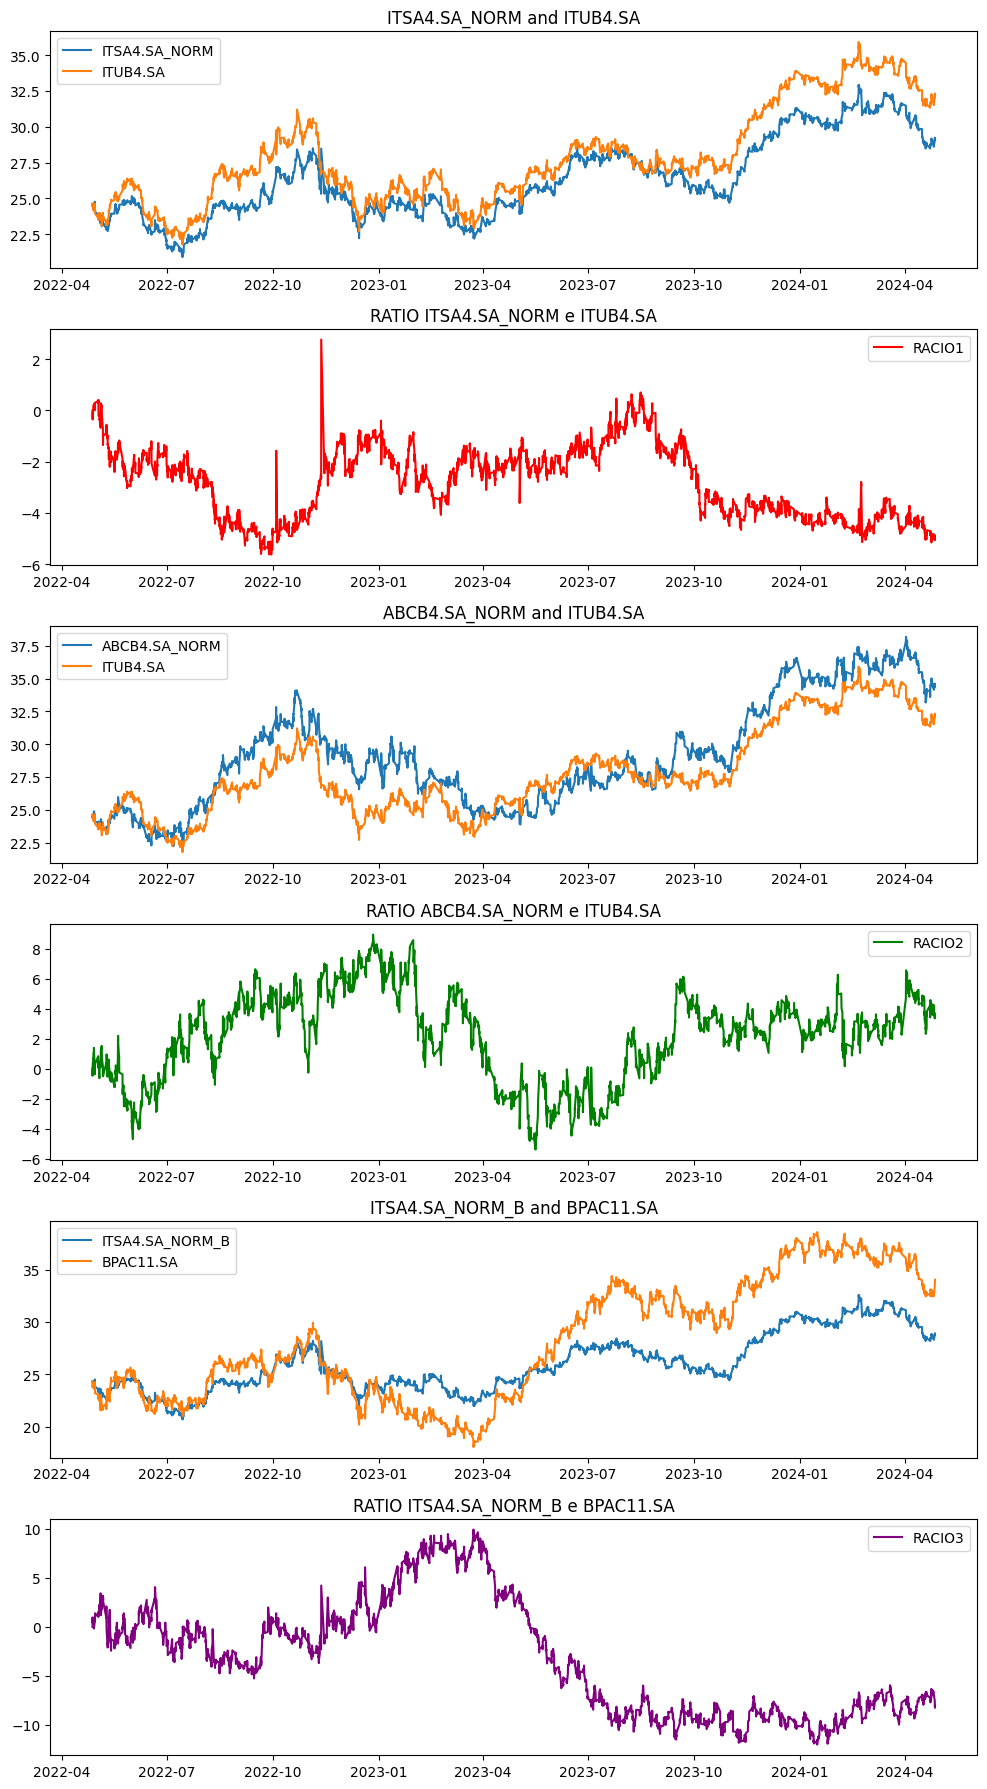

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 18))

# Gráfico 1: ITSA4.SA_NORM e ITUB4.SA
plt.subplot(6, 1, 1)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['ITSA4.SA_NORM'], label='ITSA4.SA_NORM')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['ITUB4.SA'], label='ITUB4.SA')
plt.title('ITSA4.SA_NORM and ITUB4.SA')
plt.legend()

# Gráfico 2: RATIO ITSA4.SA_NORM e ITUB4.SA
plt.subplot(6, 1, 2)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO1'], label='RACIO1', color='red')
plt.title('RATIO ITSA4.SA_NORM e ITUB4.SA')
plt.legend()

# Gráfico 3: ABCB4.SA_NORM e ITUB4.SA
plt.subplot(6, 1, 3)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['ABCB4.SA_NORM'], label='ABCB4.SA_NORM')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['ITUB4.SA'], label='ITUB4.SA')
plt.title('ABCB4.SA_NORM and ITUB4.SA')
plt.legend()

# Gráfico 4: RATIO ABCB4.SA e ITUB4.SA
plt.subplot(6, 1, 4)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO2'], label='RACIO2', color='green')
plt.title('RATIO ABCB4.SA_NORM e ITUB4.SA')
plt.legend()

# Gráfico 5: ITSA4.SA_NORM_B e BPAC11.SA
plt.subplot(6, 1, 5)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['ITSA4.SA_NORM_B'], label='ITSA4.SA_NORM_B')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['BPAC11.SA'], label='BPAC11.SA')
plt.title('ITSA4.SA_NORM_B and BPAC11.SA')
plt.legend()

# Gráfico 6: RATIO ITSA4.SA e BPAC11.SA
plt.subplot(6, 1, 6)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO3'], label='RACIO3', color='purple')
plt.title('RATIO ITSA4.SA_NORM_B e BPAC11.SA')
plt.legend()

plt.tight_layout()
plt.show()


# Identificação de Tendência com Média Móvel
### A média móvel ajuda a suavizar as flutuações de preços para identificar tendências. Quando o preço do ativo cruza acima da média móvel, pode ser um sinal de compra, e quando cruza abaixo, um sinal de venda. Para pair trading, é mais relevante quando um ativo cruza acima/abaixo da média móvel em relação ao outro ativo do par.

## Média Móvel 30 dias

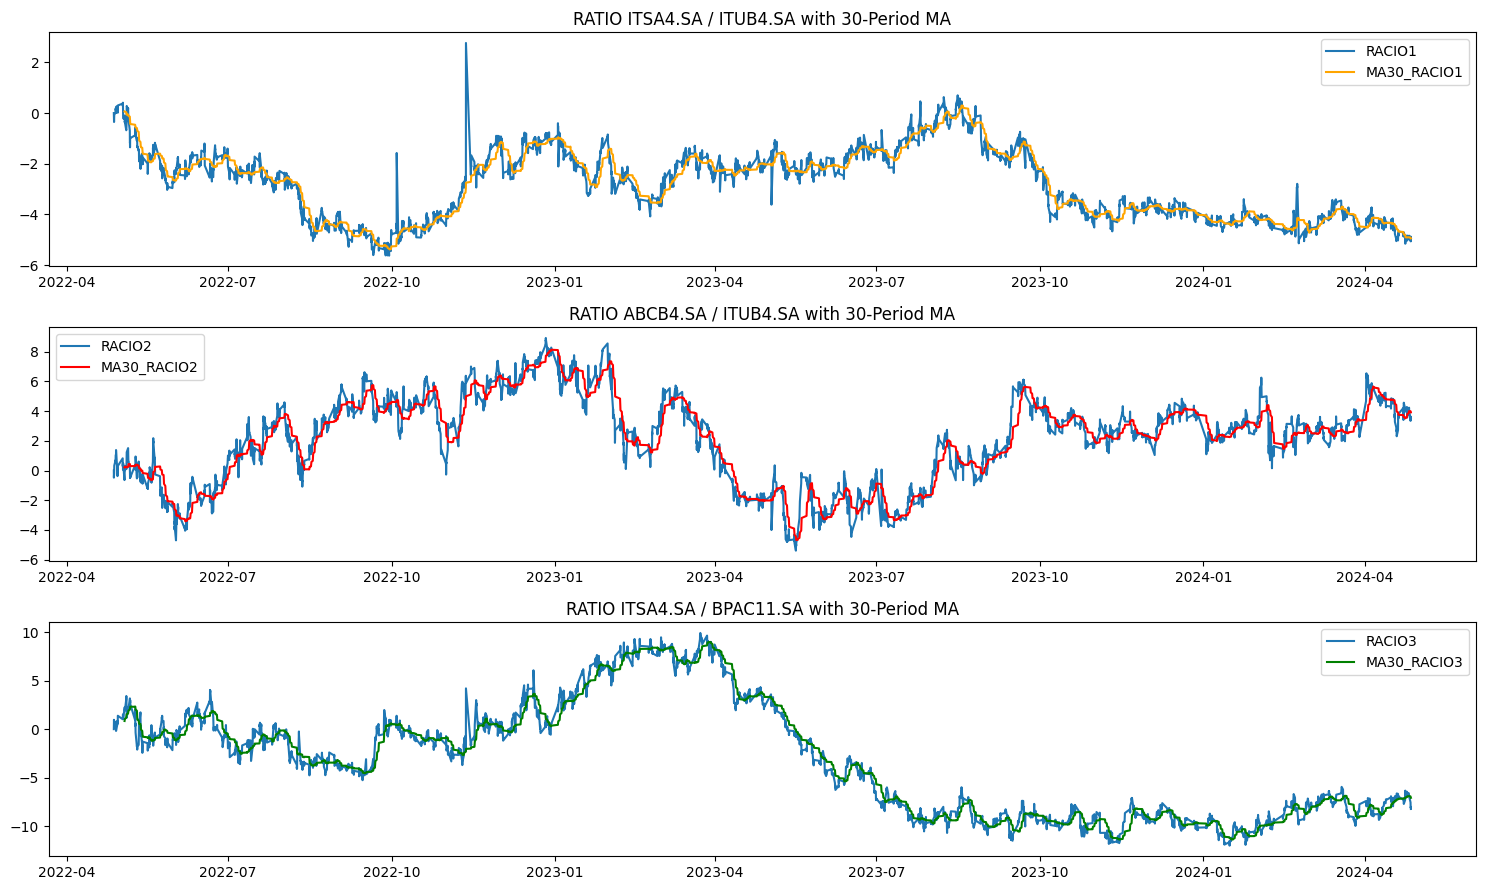

In [20]:
# Define o tamanho do período para a média móvel
window = 30

# Calcula a média móvel para cada ratio
DATA_ADMF['MA30_RACIO1'] = DATA_ADMF['RACIO1'].rolling(window=window).mean()
DATA_ADMF['MA30_RACIO2'] = DATA_ADMF['RACIO2'].rolling(window=window).mean()
DATA_ADMF['MA30_RACIO3'] = DATA_ADMF['RACIO3'].rolling(window=window).mean()

# Plota as médias móveis junto com os ratios
plt.figure(figsize=(15, 9))

# Ratio ITSA4.SA e ITUB4.SA com média móvel
plt.subplot(3, 1, 1)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO1'], label='RACIO1')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['MA30_RACIO1'], label='MA30_RACIO1', color='orange')
plt.title('RATIO ITSA4.SA / ITUB4.SA with 30-Period MA')
plt.legend()

# Ratio ABCB4.SA e ITUB4.SA com média móvel
plt.subplot(3, 1, 2)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO2'], label='RACIO2')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['MA30_RACIO2'], label='MA30_RACIO2', color='red')
plt.title('RATIO ABCB4.SA / ITUB4.SA with 30-Period MA')
plt.legend()

# Ratio ITSA4.SA e BPAC11.SA com média móvel
plt.subplot(3, 1, 3)
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['RACIO3'], label='RACIO3')
plt.plot(DATA_ADMF['Date_time'], DATA_ADMF['MA30_RACIO3'], label='MA30_RACIO3', color='green')
plt.title('RATIO ITSA4.SA / BPAC11.SA with 30-Period MA')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusão

Para o Par 1, representado pelo, a linha do ratio acompanha de perto a média móvel ao longo do tempo, indicando um relacionamento estreito entre as ações ITSA4.SA e ITUB4.SA. As ocasiões em que o ratio ultrapassa a média móvel poderiam ser consideradas pontos de entrada ou saída.

No gráfico do Par 2, vemos uma volatilidade mais expressiva, com o ratio das ações ABCB4.SA e ITUB4.SA oscilando acima e abaixo da média móvel. Isso sugere uma dinâmica de mercado mais ativa, onde as estratégias de pair trading poderiam ser implementadas para capitalizar em desvios significativos do ratio em relação à média móvel.

Por último, o Par 3 mostra um ratio para ITSA4.SA e BPAC11.SA que apresenta uma tendência distinta ao longo do tempo. Este par exibe variações consideráveis em relação à média móvel, o que pode indicar momentos de dissonância de preços entre as ações e, portanto, oportunidades para estratégias de retorno à média.

Os gráficos ilustram a importância da média móvel como ferramenta para suavizar as flutuações de curto prazo e destacar tendências de longo prazo, fundamentais na decisão de quando entrar ou sair de posições no contexto de pair trading. Eles exemplificam visualmente a aplicação prática da média móvel e como ela pode ser interpretada em conjunto com o ratio de preços para informar decisões estratégicas de trading.


# Simulação de Operações

### A partir dos dados coletados e principalmente da análise do RATIO, algumas simulações serão realizadas em diferentes variações de tempo.

In [21]:
def simulate_trades(df, entry_threshold, exit_threshold, stop_loss_percent, take_profit_percent, long_entry_col, short_entry_col, ratio_col):
    trades = []
    in_position = False
    entry_prices = {}
    entry_indices = {}

    for index, row in df.iterrows():
        racio = row[ratio_col]

        # Verifica se o RACIO está suficientemente longe de zero para entrar em posições
        if not in_position and abs(racio) > entry_threshold:
            in_position = True
            entry_prices = {
                'long': row[long_entry_col] if racio < 0 else row[short_entry_col],
                'short': row[long_entry_col] if racio > 0 else row[short_entry_col]
            }
            entry_indices = {'long': index if racio < 0 else None, 'short': index if racio > 0 else None}

        elif in_position:
            # Se estamos em posição, verificar o RACIO e os preços para decidir sobre a saída
            long_price = entry_prices['long']
            short_price = entry_prices['short']
            current_long_price = row[long_entry_col] if racio < 0 else row[short_entry_col]
            current_short_price = row[long_entry_col] if racio > 0 else row[short_entry_col]

            # Calcular mudança percentual para long e short
            long_change_percent = ((current_long_price - long_price) / long_price) * 100
            short_change_percent = ((short_price - current_short_price) / short_price) * 100

            # Condições de saída
            if (racio > exit_threshold or
                long_change_percent <= -stop_loss_percent or short_change_percent <= -stop_loss_percent or
                long_change_percent >= take_profit_percent or short_change_percent >= take_profit_percent):
                # Registrar a negociação para a posição long (se existir)
                if entry_indices['long'] is not None:
                    trades.append({
                        'entry_index': entry_indices['long'],
                        'exit_index': index,
                        'entry_price': long_price,
                        'exit_price': current_long_price,
                        'pnl': current_long_price - long_price  # P&L para posição long
                    })
                # Registrar a negociação para a posição short (se existir)
                if entry_indices['short'] is not None:
                    trades.append({
                        'entry_index': entry_indices['short'],
                        'exit_index': index,
                        'entry_price': short_price,
                        'exit_price': current_short_price,
                        'pnl': short_price - current_short_price  # P&L para posição short
                    })
                # Resetar posição
                in_position = False
                entry_prices = {}
                entry_indices = {}

    return trades

entry_threshold = 0.01
exit_threshold = 0.05
stop_loss_percent = 10
take_profit_percent = 10




In [22]:
trades_pair1 = simulate_trades(DATA_ADMF, entry_threshold, exit_threshold, stop_loss_percent, take_profit_percent, 'ITSA4.SA', 'ITUB4.SA', 'RACIO1')

trades_pair2 = simulate_trades(DATA_ADMF, entry_threshold, exit_threshold, stop_loss_percent, take_profit_percent, 'ABCB4.SA', 'ITUB4.SA', 'RACIO2')

trades_pair3 = simulate_trades(DATA_ADMF, entry_threshold, exit_threshold, stop_loss_percent, take_profit_percent, 'ITSA4.SA', 'BPAC11.SA', 'RACIO3')


In [23]:
def calculate_pnl_for_periods(trades_list, periods, df):
    pnl_by_period = {f'Last {p}M': {f'Pair {i+1}': 0 for i in range(len(trades_list))} for p in periods}

    latest_date = df['Date_time'].max()

    for i, trades in enumerate(trades_list):
        for trade in trades:
            if trade['entry_index'] is not None and trade['exit_index'] is not None:
                if trade['entry_index'] < len(df) and trade['exit_index'] < len(df):
                    entry_date = df.iloc[trade['entry_index']]['Date_time']
                    exit_date = df.iloc[trade['exit_index']]['Date_time']

                    for months in periods:
                        start_date = latest_date - pd.DateOffset(months=months)
                        if entry_date >= start_date:
                            pnl_by_period[f'Last {months}M'][f'Pair {i+1}'] += trade['pnl']
                else:
                    print(f"Index out of bounds for trade: {trade}")
            else:
                print(f"Missing index information for trade: {trade}")

    return pnl_by_period

# Definindo os períodos em meses
periods_months = [1, 3, 6, 12, 18, 24]

# Lista de trades para cada par
trades_list = [trades_pair1, trades_pair2, trades_pair3]

# Chamando a função para calcular o P&L por período para cada par
pnl_by_period = calculate_pnl_for_periods(trades_list, periods_months, DATA_ADMF)

# Convertendo o resultado para um DataFrame para melhor visualização
pnl_df = pd.DataFrame(pnl_by_period)

print(pnl_df)


         Last 1M   Last 3M   Last 6M   Last 12M    Last 18M    Last 24M
Pair 1  0.000000  0.000000  0.980000  57.202380   75.998658   92.955800
Pair 2  1.259991  0.139984 -2.429998  62.350002   70.000019  143.200021
Pair 3  0.000000  0.000000  0.964763   1.259998  160.871597  223.787870


# Conclusão

Os gráficos dos Pares 1 e 3 revelam um início relativamente estável, com o ratio mantendo-se próximo de um nível base durante os primeiros seis meses. Esta estabilidade pode indicar um alinhamento inicial das expectativas de mercado, não fornecendo sinais claros para a ativação de estratégias de pair trading. No entanto, observa-se que, nos últimos 18 a 24 meses, o Par 1 exibe um aumento considerável no ratio, sugerindo que a dinâmica de mercado entre as ações do par sofreu uma mudança significativa que pode ter sido ou não plenamente capturada pela estratégia de trading.

Quanto ao Par 2, o começo é modestamente positivo, mas logo é seguido por uma retração. A partir deste ponto, a recuperação e o posterior crescimento apontam para um padrão de volatilidade que, se bem explorado, oferece múltiplas oportunidades para pair trading. Os sinais de reversão do ratio e a trajetória ascendente indicam um potencial de lucros, especialmente no período de 12 a 24 meses.

Os lucros expressivos acumulados a longo prazo para todos os pares enfatizam a eficácia potencial da estratégia de pair trading quando empregada com flexibilidade e perspicácia. A rigidez nos períodos de trading pode subverter o potencial de ganhos, particularmente se não refletir adequadamente as oscilações do mercado.


A oscilação dos resultados não invalida necessariamente a estratégia de pair trading. Uma possível explicação para os resultados variados é a rigidez dos períodos de tempo pré-estabelecidos no estudo. Com maior flexibilidade na escolha dos momentos de entrada e saída baseados no ratio, poderiam ser identificadas oportunidades adicionais de lucro.